<a href="https://colab.research.google.com/github/MFerrugem/PDI_UFPEL/blob/main/Aula_Cor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing modules
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte

Linhas: 768 Colunas: 1408


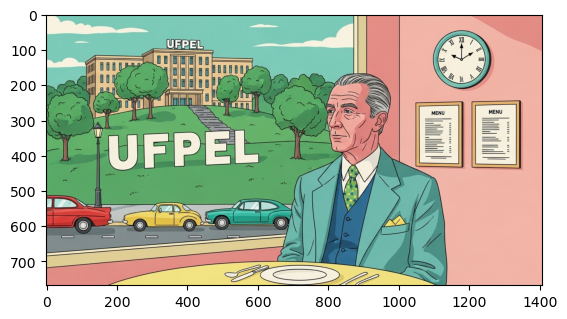

In [4]:
# Reading image using imread
image_RGB_color=io.imread('images/UFPEL_COR.jpg')
image_gray=rgb2gray(image_RGB_color)

linha,coluna=image_gray.shape

print('Linhas:',linha,'Colunas:',coluna)


plt.imshow(image_RGB_color)
plt.show()

In [6]:

image_RGB_GRAY=image_RGB_color.copy()

image_RGB_GRAY[:,:,0]=img_as_ubyte(image_gray)
image_RGB_GRAY[:,:,1]=img_as_ubyte(image_gray)
image_RGB_GRAY[:,:,2]=img_as_ubyte(image_gray)

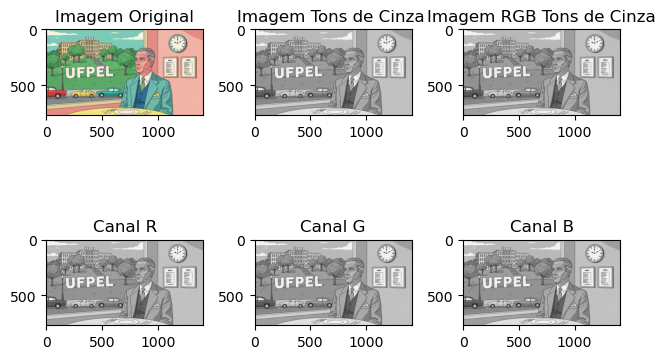

In [8]:
fig, axes = plt.subplots(2,3)


axes[0][0].imshow(image_RGB_color)
axes[0][0].set_title("Imagem Original")

axes[0][1].imshow(image_gray, cmap=plt.cm.gray)
axes[0][1].set_title("Imagem Tons de Cinza ")


axes[0][2].imshow(image_RGB_GRAY, cmap=plt.cm.gray)
axes[0][2].set_title("Imagem RGB Tons de Cinza")


axes[1][0].imshow(image_RGB_GRAY[:,:,0], cmap=plt.cm.gray)
axes[1][0].set_title("Canal R")

axes[1][1].imshow(image_RGB_GRAY[:,:,1], cmap=plt.cm.gray)
axes[1][1].set_title("Canal G")


axes[1][2].imshow(image_RGB_GRAY[:,:,2], cmap=plt.cm.gray)
axes[1][2].set_title("Canal B")

fig.tight_layout()
plt.show()

In [32]:
for i in range(linha):
	for j in range(coluna):
		if image_RGB_color[i,j,1] > 100: #canal R
			if image_RGB_color[i,j,0] > 50 and image_RGB_color[i,j,0] < 100: #canal G
				if image_RGB_color[i,j,2] > 50 and image_RGB_color[i,j,2] < 100: #canal B
					image_RGB_GRAY[i,j,:]=image_RGB_color[i,j,:].copy()

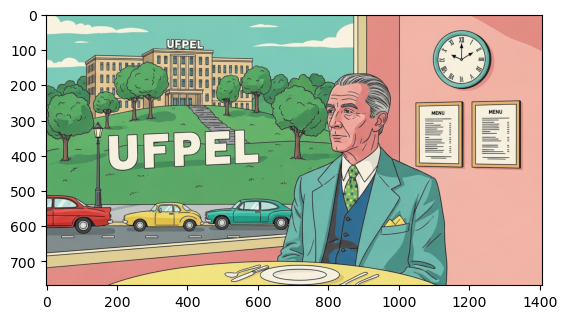

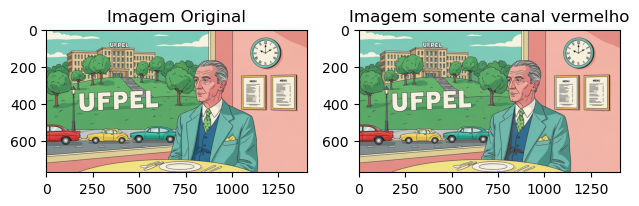

In [33]:
plt.imshow(image_RGB_GRAY)
plt.show()


fig, axes = plt.subplots(1,2)

axes[0].imshow(image_RGB_color)
axes[0].set_title("Imagem Original")


axes[1].imshow(image_RGB_GRAY)
axes[1].set_title("Imagem somente canal vermelho")

fig.tight_layout()
plt.show()

In [10]:
for i in range(linha):
    for j in range(coluna):
        R = image_RGB_color[i,j,0]  # Vermelho
        G = image_RGB_color[i,j,1]  # Verde
        B = image_RGB_color[i,j,2]  # Azul
        
        if G > 100 and R < 50 and B < 50:  # Verde alto, vermelho e azul baixos
            image_RGB_GRAY[i,j] = image_RGB_color[i,j]  # Copia o pixel verde

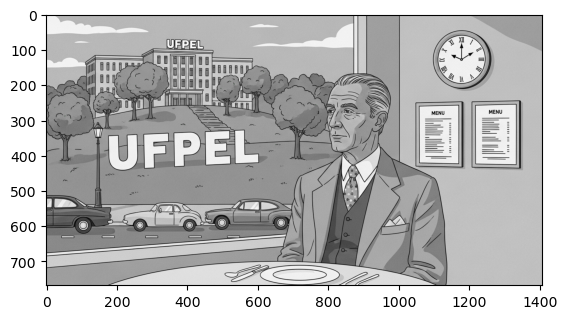

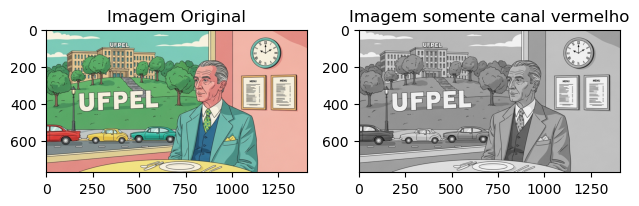

In [11]:
plt.imshow(image_RGB_GRAY)
plt.show()


fig, axes = plt.subplots(1,2)

axes[0].imshow(image_RGB_color)
axes[0].set_title("Imagem Original")


axes[1].imshow(image_RGB_GRAY)
axes[1].set_title("Imagem somente canal vermelho")

fig.tight_layout()
plt.show()

In [10]:
limiar_verde_min = 50   # Verde mínimo para ser considerado
limiar_razao = 1.2     # G deve ser 1.5x maior que R e B

for i in range(linha):
    for j in range(coluna):
        R, G, B = image_RGB_color[i,j]

        if (G > limiar_verde_min and           # Verde não muito escuro
            G > R * limiar_razao and           # Verde >> Vermelho
            G > B * limiar_razao):             # Verde >> Azul
            image_RGB_GRAY[i,j] = image_RGB_color[i,j]

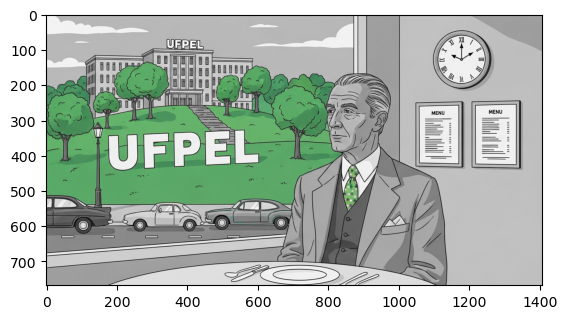

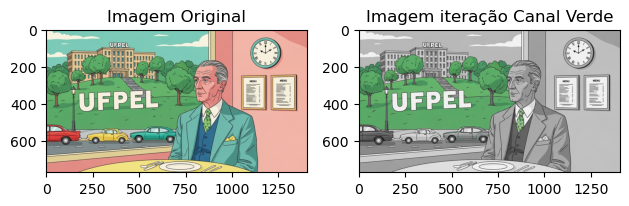

In [11]:
plt.imshow(image_RGB_GRAY)
plt.show()


fig, axes = plt.subplots(1,2)

axes[0].imshow(image_RGB_color)
axes[0].set_title("Imagem Original")


axes[1].imshow(image_RGB_GRAY)
axes[1].set_title("Imagem iteração Canal Verde")

fig.tight_layout()
# Salva a figura (ANTES do plt.show()!)
plt.savefig("verdeUFPEL.png", dpi=300, bbox_inches='tight')  # ou .jpg, .pdf, etc.
plt.show()

In [14]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hsv

In [ ]:
# Reading image using imread
image_RGB_color=io.imread('images/UFPEL_COR.jpg')
image_gray=rgb2gray(image_RGB_color)

linha,coluna=image_gray.shape

print('Linhas:',linha,'Colunas:',coluna)


plt.imshow(image_RGB_color)
plt.show()

Linhas: 768 Colunas: 1408


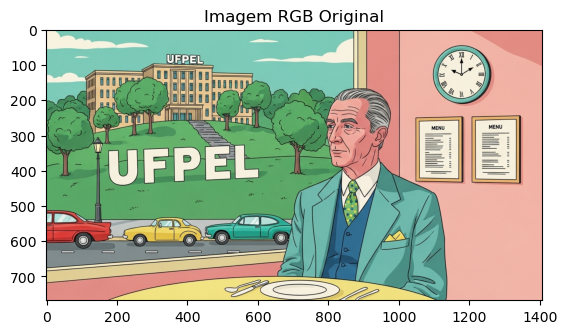

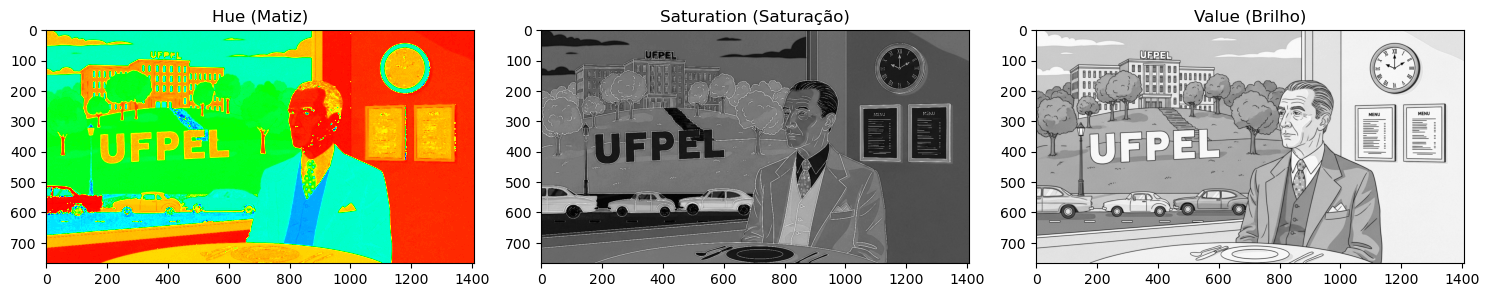

In [16]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2hsv, rgb2gray

# Carrega a imagem RGB
image_RGB_color = io.imread('images/UFPEL_COR.jpg')

# Converte RGB para HSV
image_HSV = rgb2hsv(image_RGB_color)  # Formato: (H, S, V), com valores H [0,1], S [0,1], V [0,1]

# Converte RGB para escala de cinza (opcional, se ainda necessário)
image_gray = rgb2gray(image_RGB_color)

linha, coluna = image_gray.shape
print('Linhas:', linha, 'Colunas:', coluna)

# Mostra a imagem original RGB
plt.imshow(image_RGB_color)
plt.title("Imagem RGB Original")
plt.show()

# Mostra os canais HSV separadamente
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_HSV[:, :, 0], cmap='hsv')  # Canal Hue (Matiz)
axes[0].set_title("Hue (Matiz)")
axes[1].imshow(image_HSV[:, :, 1], cmap='gray')  # Canal Saturation (Saturação)
axes[1].set_title("Saturation (Saturação)")
axes[2].imshow(image_HSV[:, :, 2], cmap='gray')  # Canal Value (Brilho)
axes[2].set_title("Value (Brilho)")
plt.tight_layout()
plt.show()

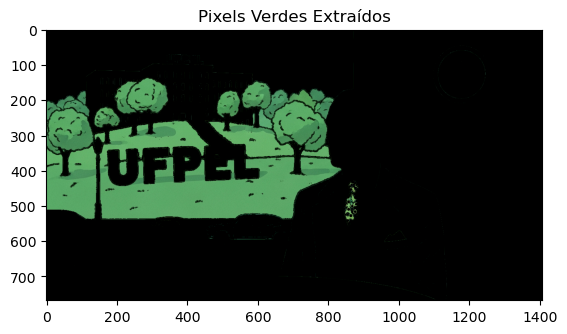

In [18]:
# Define a faixa de verde em HSV
hue_min, hue_max = 0.25, 0.45  # Verde: ~40° a 162°
saturation_min = 0.4  # Saturação mínima

# Cria máscara booleana
mask = (image_HSV[:, :, 0] >= hue_min) & (image_HSV[:, :, 0] <= hue_max) & (image_HSV[:, :, 1] >= saturation_min)

# Aplica máscara na imagem RGB original
image_green = image_RGB_color.copy()
image_green[~mask] = 0  # Define pixels não verdes como pretos

# Mostra o resultado
plt.imshow(image_green)
plt.title("Pixels Verdes Extraídos")
plt.show()

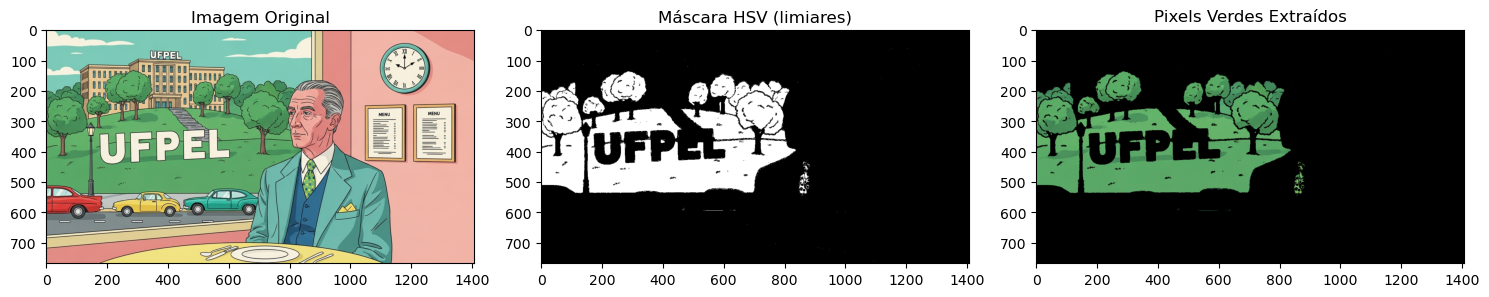

In [20]:


# Define os limiares em HSV (equivalente aos limiares RGB que você usou)
hue_min = 0.25    # ~90° (verde puro)
hue_max = 0.45    # ~162° (verde-azulado)
saturation_min = 0.4  # Saturação mínima (cores vivas)
value_min = 0.3    # Brilho mínimo (evita tons escuros)

# Versão 1: Máscara booleana (equivalente ao seu limiar RGB)
mask = (
    (image_HSV[:, :, 0] >= hue_min) & 
    (image_HSV[:, :, 0] <= hue_max) & 
    (image_HSV[:, :, 1] >= saturation_min) & 
    (image_HSV[:, :, 2] >= value_min)
)

# Versão 2: Limiar por razão (equivalente ao G > R*1.2 e G > B*1.2)
# Aqui usamos a matiz (H) para garantir que o verde domine
hue_center = 0.33  # Verde puro no HSV (120°)
hue_width = 0.1    # Largura aceitável em torno do verde

mask_ratio = (
    (np.abs(image_HSV[:, :, 0] - hue_center) <= hue_width) & 
    (image_HSV[:, :, 1] > saturation_min) & 
    (image_HSV[:, :, 2] > value_min)
)

# Aplica a máscara
image_green = image_RGB_color.copy()
image_green[~mask] = 0  # Pixels não verdes ficam pretos

# Mostra os resultados
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(image_RGB_color)
plt.title("Imagem Original")

plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title("Máscara HSV (limiares)")

plt.subplot(133)
plt.imshow(image_green)
plt.title("Pixels Verdes Extraídos")

plt.tight_layout()
plt.show()

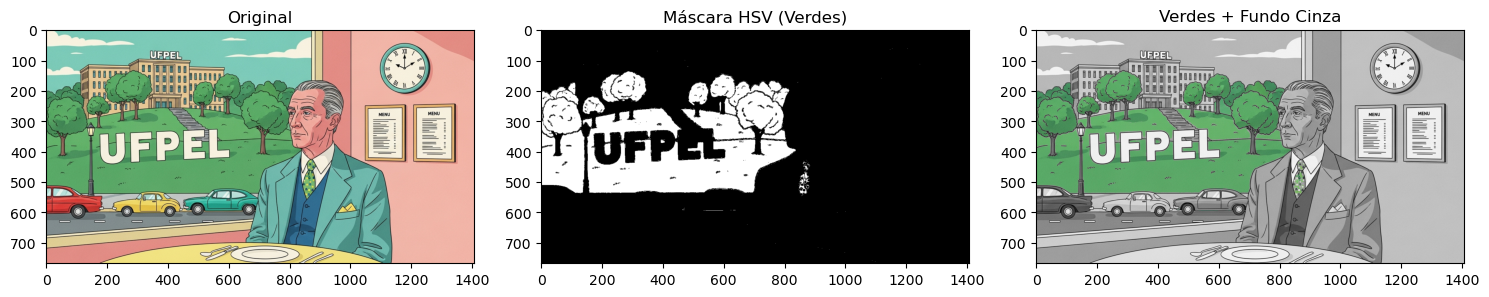

In [26]:
import matplotlib.pyplot as plt
from skimage import io, color
import numpy as np

# 1. Carregar imagem e converter para HSV e escala de cinza
image_RGB_color = io.imread('images/UFPEL_COR.jpg')
image_HSV = color.rgb2hsv(image_RGB_color)
image_gray = color.rgb2gray(image_RGB_color)  # Converter para escala de cinza [0, 1]

# 2. Definir limiares HSV para verdes
hue_min, hue_max = 0.25, 0.45  # Faixa de matiz para verde
saturation_min = 0.4  # Saturação mínima
value_min = 0.3  # Brilho mínimo

# 3. Criar máscara booleana (CORRIGIDO - parênteses fechados corretamente)
mask = (
    (image_HSV[:, :, 0] >= hue_min) & 
    (image_HSV[:, :, 0] <= hue_max) & 
    (image_HSV[:, :, 1] >= saturation_min) & 
    (image_HSV[:, :, 2] >= value_min)
)

# 4. Criar imagem resultante:
#    - Pixels verdes mantêm cor original
#    - Outros pixels são convertidos para cinza
image_result = np.zeros_like(image_RGB_color)

# Versão otimizada (sem loop for)
image_result[mask] = image_RGB_color[mask]  # Mantém verdes
gray_rgb = (image_gray * 255)[:, :, np.newaxis]  # Converte cinza para 3 canais
image_result[~mask] = np.repeat(gray_rgb[~mask], 3, axis=1)  # Preenche não-verdes com cinza

# 5. Mostrar resultados
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(image_RGB_color), plt.title("Original")
plt.subplot(132), plt.imshow(mask, cmap='gray'), plt.title("Máscara HSV (Verdes)")
plt.subplot(133), plt.imshow(image_result), plt.title("Verdes + Fundo Cinza")
plt.tight_layout()
plt.show()